# Principal Component Analysis (PCA) of the dataset

In [46]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df = pd.read_json('../SummaRuNNer/data/processed/train_data_features.json', lines=True)

In [48]:
from display_pandas import display_side_by_side
print('Train Data\tTest Data')
display_side_by_side(df.describe(), df.describe())

Train Data	Test Data


id 
 
 
 
 
 count 
 366.000000 
 
 
 mean 
 3674.500000 
 
 
 std 
 1412.557139 
 
 
 min 
 2043.000000 
 
 
 25% 
 2209.250000 
 
 
 50% 
 3685.000000 
 
 
 75% 
 4618.500000 
 
 
 max 
 6808.000000 
 
 
 
 
 
 
 id 
 
 
 
 
 count 
 366.000000 
 
 
 mean 
 3674.500000 
 
 
 std 
 1412.557139 
 
 
 min 
 2043.000000 
 
 
 25% 
 2209.250000 
 
 
 50% 
 3685.000000 
 
 
 75% 
 4618.500000 
 
 
 max 
 6808.000000

## Reformat the Dataset

Extract sentences from texts and put them in one big list with their respective labels (1 - part of the summary, 0 - not part of the summary)

Whenever a keyword is found in one of the sentences, double its occurence in it (just add it at the begining of the sentence once more)

In [49]:
def double_keywords(sentences, keywords):
    for index, sent in enumerate(sentences):
        for word in keywords:
            if word in sent:
                sentences[index] = word + ' ' + sent

In [50]:
def put_data_in_list(dataFrame):
    data = list()
    target = list()
    for index, row in dataFrame.iterrows():
        sentences = row['doc'].split('\n')
        keywords = row['keywords'].split(', ')
        double_keywords(sentences, keywords)
        data += sentences
        target += row['labels'].split('\n')
    return data, target

In [51]:
sip_word_train, sip_train_target = put_data_in_list(df)

In [52]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.under_sampling import RandomUnderSampler, NearMiss

pca = TruncatedSVD(n_components=2)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(sip_word_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train_tfidf, sip_train_target)

projected = pca.fit_transform(X_resampled)
# print(X_resampled.shape)
# print(projected.shape)

## Create a 2D plot

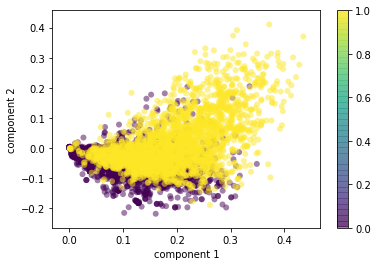

In [24]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_resampled, edgecolor='none', alpha=0.5,
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Create a 3D plot

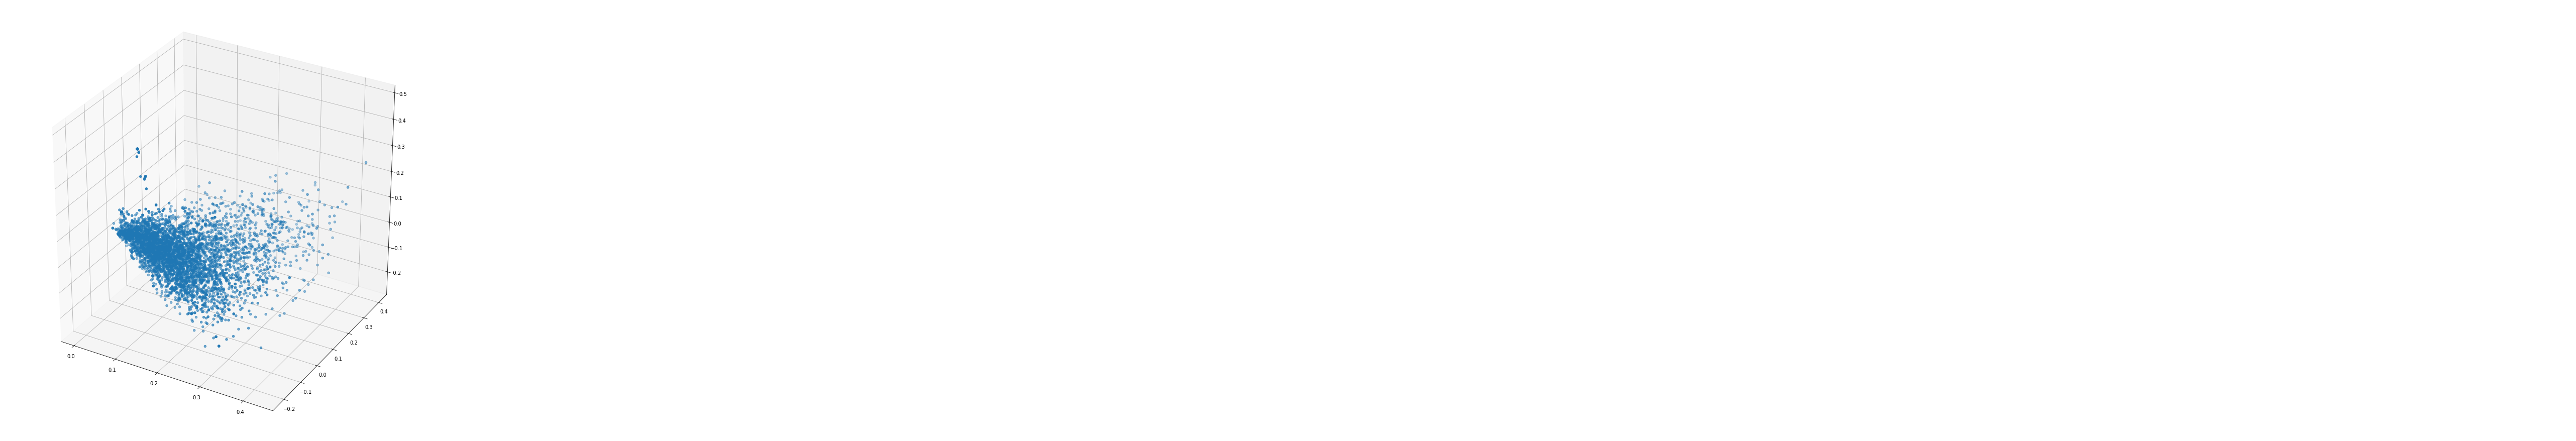

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2])
plt.show()